# Climate Warming - Giannoulopoulos George
#### Use any dataset provided at https://data.giss.nasa.gov/gistemp/ to visualize, in an effective way, global warming.
Graphs and tables are updated around the middle of every month using current data files from NOAA GHCN v3 (meteorological stations)he Global Historical Climatology Network-Monthly (GHCN-M) temperature dataset was first developed in the early 1990s (Vose et al. 1992). A second version was released in 1997 following extensive efforts to increase the number of stations and length of the data record (Peterson and Vose, 1997). Methods for removing inhomogeneities from the data record associated with non-climatic influences such as changes in instrumentation, station environment, and observing practices that occur over time were also included in the version 2 release (Peterson and Easterling, 1994; Easterling and Peterson 1995). Since that time efforts have focused on continued improvements in dataset development methods including new quality control processes and advanced techniques for removing data inhomogeneities (Menne and Williams, 2009). Effective May 2, 2011, the Global Historical Climatology Network-Monthly (GHCN-M) version 3 dataset of monthly mean temperature has replaced GHCN-M version 2 as the dataset for operational climate monitoring activities. The dataset is available at ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/v3/. The formal designation is ghcnm.x.y.z[optionally -betan].yyyymmdd

The GHCNM v3 has been released.  This version currently contains 
        monthly mean temperature, monthly maximum temperature and
        monthly minimum temperature.  The station network for the time being,
        is the same as GHCN-Monthly version 2 (7280 stations).  A new 
        software processing system is now responsible for daily reprocessing
        of the dataset. This reprocessing consists of a construction process
        that assembles the data in a specific source priority order, quality
        controls the data, identifies inhomogeneities and performs adjustments
        where possible. In addition, graphical products, including individual
        station time series plots are produced daily.

        V3 contains two different dataset files per each of the three elements.
        "QCU" files represent the quality controlled unadjusted data, and 
        "QCA" files represent the quality controlled adjusted data. The unadjusted 
        data are often referred to as the "raw" data. It is important to note that
        the term "unadjusted" means that the developers of GHCNM have not made any
        adjustments to these received and/or collected data, but it is entirely 
        possible that the source of these data (generally National Meteorological 
        Services) may have made adjustments to these data prior to their inclusion
        within the GHCNM.  Often it is difficult or impossible to know for sure,
        if these original sources have made adjustments, so users who desire 
        truly "raw" data would need to directly contact the data source.
        The "adjusted" data contain bias corrected data (e.g. adjustments made
        by the developers of GHCNM), and so these data can differ from the 
        "unadjusted" data.
        
DATA 

         The data within GHCNM v3 for the time being consist of monthly
         average temperature, and maximum and minimum temperature, for the 
         7280 stations contained within GHCNM v2. Several new sources have 
         been added to v3, and a new "3 flag" format has been introduced, 
         similar to that used within the Global Historical Climatology 
         Network-Daily (GHCND).

    2.2.1 DATA FORMAT

          Variable          Columns      Type
          --------          -------      ----

          ID                 1-11        Integer
          YEAR              12-15        Integer
          ELEMENT           16-19        Character
          VALUE1            20-24        Integer
          DMFLAG1           25-25        Character
          QCFLAG1           26-26        Character
          DSFLAG1           27-27        Character
            .                 .             .
            .                 .             .
            .                 .             .
          VALUE12          108-112       Integer
          DMFLAG12         113-113       Character
          QCFLAG12         114-114       Character
          DSFLAG12         115-115       Character

          Variable Definitions:

          ID: 11 digit identifier, digits 1-3=Country Code, digits 4-8 represent
              the WMO id if the station is a WMO station.  It is a WMO station if
              digits 9-11="000".

          YEAR: 4 digit year of the station record.
 
          ELEMENT: element type, monthly mean temperature="TAVG"
                                 monthly maximum temperature="TMAX"
                                 monthly minimum temperature="TMIN"

          VALUE: monthly value (MISSING=-9999).  Temperature values are in
                 hundredths of a degree Celsius, but are expressed as whole
                 integers (e.g. divide by 100.0 to get whole degrees Celsius).

          DMFLAG: data measurement flag, nine possible values:

                  blank = no measurement information applicable
                  a-i = number of days missing in calculation of monthly mean
                        temperature (currently only applies to the 1218 USHCN
                        V2 stations included within GHCNM)

          QCFLAG: quality control flag, seven possibilities within
                  quality controlled unadjusted (qcu) dataset, and 2 
                  possibilities within the quality controlled adjusted (qca) 
                  dataset.
          DSFLAG: data source flag for monthly value, 21 possibilities:

In [186]:
# Import the necessary modules
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# Load the data as a pandas dataframe
dt = pd.read_csv('ghcnm.tavg.v3.3.0.20181219.qca.dat.csv')

# First 5 rows
dt.head()

,10160355000,1878,TAVG,958,,.1,1,1018,.2,.3,...,Q,1.9,1438,.19,.20,1.10,1218,.21,.22,1.11
0,10160355000,1879,TAVG,1248,,,1,1238,,,...,,1,1518,,,1,968,,,1
1,10160355000,1880,TAVG,1028,,,1,1178,,,...,,1,1638,,,1,1358,,,1
2,10160355000,1931,TAVG,-9999,,,,1038,,,...,,1,1618,,,1,1128,,,1
3,10160355000,1932,TAVG,1078,,,1,1048,,,...,,,-9999,,,,-9999,,,
4,10160355000,1933,TAVG,-9999,,,,-9999,,,...,,1,1548,,,1,1198,,,1


In [3]:
# In order to avoid the first line to become the headers of the dataframe, a header list needs to be provided.
def create_headers(s):
    """
    (int)->(list of ints)
    
    Create an index list of size s
    """
    index_list = list(range(s))
    return index_list

# The header list
header_list = create_headers(dt.shape[1])

dt = pd.read_csv('ghcnm.tavg.v3.3.0.20181219.qca.dat.csv', names=header_list, header=None)
dt.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,10160355000,1878,TAVG,958,,,1,1018,,,...,Q,1,1438,,,1,1218,,,1
1,10160355000,1879,TAVG,1248,,,1,1238,,,...,,1,1518,,,1,968,,,1
2,10160355000,1880,TAVG,1028,,,1,1178,,,...,,1,1638,,,1,1358,,,1
3,10160355000,1931,TAVG,-9999,,,,1038,,,...,,1,1618,,,1,1128,,,1
4,10160355000,1932,TAVG,1078,,,1,1048,,,...,,,-9999,,,,-9999,,,


In [4]:
def columns_to_keep():
    """
    Creates the list of the columns to be kept from
    the dataframe
    """
    keep_list = [0,1]
    for i in range(3,50,4):
        keep_list.append(i)
        
    return keep_list

# The list of the columns to keep
desired_columns = columns_to_keep()

# The list of the columns to be dropped from the dataframe
drop_list = [x for x in header_list if x not in desired_columns]

# Drop the unwanted columns
dt = dt.drop(labels=drop_list, axis='columns')
dt.head()

,0,1,3,7,11,15,19,23,27,31,35,39,43,47
0,10160355000,1878,958,1018,1178,1678,2048,2308,2558,2748,2388,-9999,1438,1218
1,10160355000,1879,1248,1238,1288,1618,1628,2338,2468,2578,2308,1818,1518,968
2,10160355000,1880,1028,1178,1308,1588,1778,2138,2648,2638,2358,2128,1638,1358
3,10160355000,1931,-9999,1038,-9999,-9999,1918,2458,-9999,2668,2228,1998,1618,1128
4,10160355000,1932,1078,1048,-9999,1488,1908,-9999,2358,-9999,2508,-9999,-9999,-9999


In [5]:
# Rename the columns
dt.rename(columns={0:"ID", 1:"Year", 3:"January", 7:"February", 11:"March", 15:"April",
           19:"May", 23:"June", 27:"July", 31:"August", 35:"September",
           39:"October", 43:"November", 47:"December"}, inplace=True)
dt.head(10)

,ID,Year,January,February,March,April,May,June,July,August,September,October,November,December
0,10160355000,1878,958,1018,1178,1678,2048,2308,2558,2748,2388,-9999,1438,1218
1,10160355000,1879,1248,1238,1288,1618,1628,2338,2468,2578,2308,1818,1518,968
2,10160355000,1880,1028,1178,1308,1588,1778,2138,2648,2638,2358,2128,1638,1358
3,10160355000,1931,-9999,1038,-9999,-9999,1918,2458,-9999,2668,2228,1998,1618,1128
4,10160355000,1932,1078,1048,-9999,1488,1908,-9999,2358,-9999,2508,-9999,-9999,-9999
5,10160355000,1933,-9999,-9999,-9999,-9999,1938,-9999,-9999,-9999,-9999,2228,1548,1198
6,10160355000,1934,1098,1038,1258,1618,1828,-9999,2518,2528,2188,1888,1538,1398
7,10160355000,1935,928,1158,1288,1568,-9999,2218,-9999,-9999,2348,-9999,1558,1318
8,10160355000,1936,1378,1448,1428,1618,-9999,2018,2438,2418,2408,1768,1478,1148
9,10160355000,1937,1268,1318,1518,1538,-9999,2268,2388,2538,2338,2028,1768,1168


In [6]:
def fill_missing_values(dataframe):
    """
    (DataFrame)->(DataFrame)
    
    Replaces the missing temperature values in the dataframe with the 
    average value of the previous and following year. If the previous or the following
    year values are also missing then the next or previous year are considered.
    """
    # Scan the dataframe
    for i in range(dataframe.shape[0]):
        for j in range(2, dataframe.shape[1]):
            
            if dataframe.iloc[i,j]==(-9999):
                dataframe.iloc[i,j] = average_value(dataframe, i, j)
                
    return dataframe

            
def average_value(dataframe, row, column):
    """
    (DataFrame, int, int)->(int)
    
    Calculate the average value of the previous and following year.
    """
    
    # If the cell is not at the first of last row
    if row>0 and row<(dataframe.shape[0]-1):
        
        previous_value = dataframe.iloc[row-1,column]
        next_value = dataframe.iloc[row+1,column]
        
        # If the previous or the next value is missing then search farther
        if previous_value==(-9999):
            previous_value = find_previous(dataframe, row-1, column)
        if next_value==(-9999):
            next_value = find_next(dataframe, row+1, column)
            
        avg = (previous_value+next_value)//2 # Calculate the average
        
    elif row==0: # If the cell is at the first row
        next_value = dataframe.iloc[row+1,column]
        
        if next_value==(-9999):
            next_value = find_next(dataframe, row+1, column)
        avg = next_value
        
    else: # If the cell is at the last row
        previous_value = dataframe.iloc[row-1,column]
        
        if previous_value==(-9999):
            previous_value = find_previous(dataframe, row-1, column)
        avg = previous_value
    
    return avg


        
def find_previous(dataframe, row, column):
    """
    (DataFrame, int, int)->(int)
    
    Find the previous non missing value.
    """
    previous_value = dataframe.iloc[row,column]
    i=row
    
    # While the previous value is missing go one step further back.
    while previous_value==(-9999):
        # If the cell is at the first row, replace it with the average earth value.
        if i>0:
            i-=1
            previous_value = dataframe.iloc[i,column]
        else:
            previous_value = 1460
            
    return previous_value


def find_next(dataframe, row, column):
    """
    (DataFrame, int, int)->(int)
    
    Find the next non missing value.
    """
    next_value = dataframe.iloc[row,column]
    i=row
    
    # While the next value is missing go one step further forward.
    while next_value==(-9999):
        # If the cell is at the last row, replace it with the average earth value.
        if i<(dataframe.shape[0]-1):
            i+=1
            next_value = dataframe.iloc[i,column]
        else:
            next_value = 1460
            
    return next_value
        
             
    

In [24]:
# An array with all the stations IDs(7280).
stations_array = dt.iloc[:,0].unique()

In [18]:
# For each station ID get the sub-dataframe and fill missing values then append it to an empty one.
# By splitting the dataframe to subsets, the values from different stations dont affect the missing
# values of the others.

df_fixed = pd.DataFrame()
for i in stations_array:
    df_fixed = df_fixed.append(fill_missing_values(dt.loc[dt['ID']==i]))
df_fixed.head(10)

,ID,Year,January,February,March,April,May,June,July,August,September,October,November,December
0,10160355000,1878,958,1018,1178,1678,2048,2308,2558,2748,2388,1818,1438,1218
1,10160355000,1879,1248,1238,1288,1618,1628,2338,2468,2578,2308,1818,1518,968
2,10160355000,1880,1028,1178,1308,1588,1778,2138,2648,2638,2358,2128,1638,1358
3,10160355000,1931,1053,1038,1283,1538,1918,2458,2503,2668,2228,1998,1618,1128
4,10160355000,1932,1078,1048,1270,1488,1908,2338,2358,2598,2508,2113,1583,1163
5,10160355000,1933,1088,1043,1264,1553,1938,2278,2438,2563,2348,2228,1548,1198
6,10160355000,1934,1098,1038,1258,1618,1828,2248,2518,2528,2188,1888,1538,1398
7,10160355000,1935,928,1158,1288,1568,1788,2218,2478,2473,2348,1828,1558,1318
8,10160355000,1936,1378,1448,1428,1618,1768,2018,2438,2418,2408,1768,1478,1148
9,10160355000,1937,1268,1318,1518,1538,1758,2268,2388,2538,2338,2028,1768,1168


In [30]:
# An array with all the years.
years_array = df_fixed.iloc[:,1].unique()

In [87]:
df_years = pd.DataFrame(columns=["Year", "January", "February", "March", "April",
           "May", "June", "July", "August", "September", "October", "November", "December"])

# For each year calculate the average monthly temperature for all stations
for i in years_array:
    subset = df_fixed.loc[df_fixed['Year']==i] # The sub dataframe for each year
    
    # Calculate the average values for each column, resulting in a pd.Series and append it to df_years.
    df_years = df_years.append(subset.iloc[:,1:].mean(axis=0), ignore_index=True)
    

def pretty_df(dataframe):
    """
    (DataFrame)->(DataFrame)
    
    Cosmetic intervention
    """
    dataframe['Year'] = dataframe['Year'].astype(int)
    dataframe = dataframe.sort_values(by='Year')
    
    return dataframe

final_df = pretty_df(df_years)
final_df.head(10)

,Year,January,February,March,April,May,June,July,August,September,October,November,December
276,1701,-491.0,-221.0,89.0,764.0,1389.0,1469.0,1819.0,1509.0,1274.0,874.0,239.0,-121.0
277,1702,129.0,-121.0,-11.0,189.0,1019.0,1529.0,1529.0,1509.0,939.0,679.0,-51.0,-11.0
278,1703,-351.0,-161.0,-11.0,699.0,1339.0,1539.0,1469.0,1559.0,1069.0,539.0,149.0,179.0
279,1704,-561.0,-121.0,319.0,869.0,1109.0,1339.0,1639.0,1634.0,934.0,609.0,74.0,-161.0
280,1705,-781.0,-236.0,29.0,714.0,1099.0,1529.0,1759.0,1709.0,799.0,679.0,-1.0,109.0
281,1706,-180.5,-15.5,259.5,714.5,1274.5,1684.5,1659.5,1574.5,1224.5,924.5,254.5,169.5
282,1707,-115.5,259.5,229.5,609.5,1109.5,1664.5,1729.5,1509.5,1279.5,634.5,369.5,89.5
283,1708,229.5,84.5,454.5,744.5,1109.5,1389.5,1339.5,1744.5,1399.5,494.5,234.5,-245.5
284,1709,-950.5,-395.5,29.5,909.5,1054.5,1629.5,1559.5,1544.5,1224.5,844.5,499.5,119.5
285,1710,-165.5,-30.5,399.5,782.0,1274.5,1574.5,1544.5,1522.0,1309.5,897.0,467.0,247.0


In [106]:
def dataframe_to_timeseries(dataframe):
    """
    (DataFrame)->(Series)
    
    Transform the DataFrame to a Series with the correct DateTimeIndex
    """
    columns_dict={1:"January", 2:"February", 3:"March", 4:"April",
           5:"May", 6:"June", 7:"July", 8:"August", 9:"September",
           10:"October", 11:"November", 12:"December"}
    
    timeseries = pd.Series()
    
    # Iterate over the dataframe
    for i in range(dataframe.shape[0]):
        for j in range(1,dataframe.shape[1]):
            
            # Append a series to the timeseries where the index is in datetime format
            timeseries = timeseries.append(pd.Series(dataframe.iloc[i,j],
                                                     index=[pd.to_datetime(columns_dict[j]+' '+str(dataframe.iloc[i,0]))]))
    
    # Cosmetic Intervention
    timeseries = (timeseries/100).round(decimals=1)
       
    return timeseries

timeseries = dataframe_to_timeseries(final_df)
timeseries.head(10)

1701-01-01    -4.9
1701-02-01    -2.2
1701-03-01     0.9
1701-04-01     7.6
1701-05-01    13.9
1701-06-01    14.7
1701-07-01    18.2
1701-08-01    15.1
1701-09-01    12.7
1701-10-01     8.7
dtype: float64

In [183]:
timeseries.tail(10)

2018-03-01     9.4
2018-04-01    13.2
2018-05-01    18.2
2018-06-01    20.6
2018-07-01    22.2
2018-08-01    21.6
2018-09-01    19.0
2018-10-01    14.5
2018-11-01     9.2
2018-12-01     5.5
dtype: float64

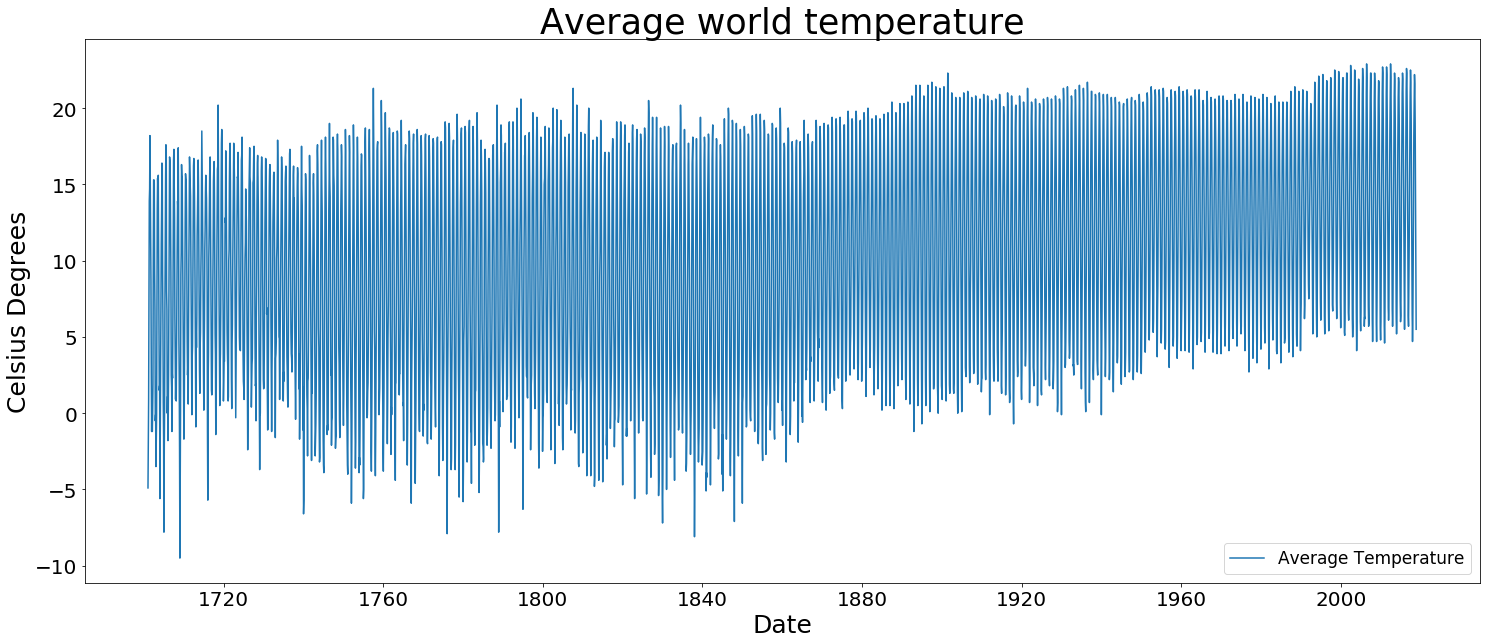

In [166]:
# Universal matplotlib figure size
plt.rcParams['figure.figsize'] = (25,10)

# Plot the timeseries
plt.plot(timeseries, label='Average Temperature')
plt.title('Average world temperature', fontdict={'fontsize':35})
plt.legend(loc=4, fontsize=17)
plt.xlabel('Date', fontdict={'fontsize':25})
plt.ylabel('Celsius Degrees', fontdict={'fontsize':25})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

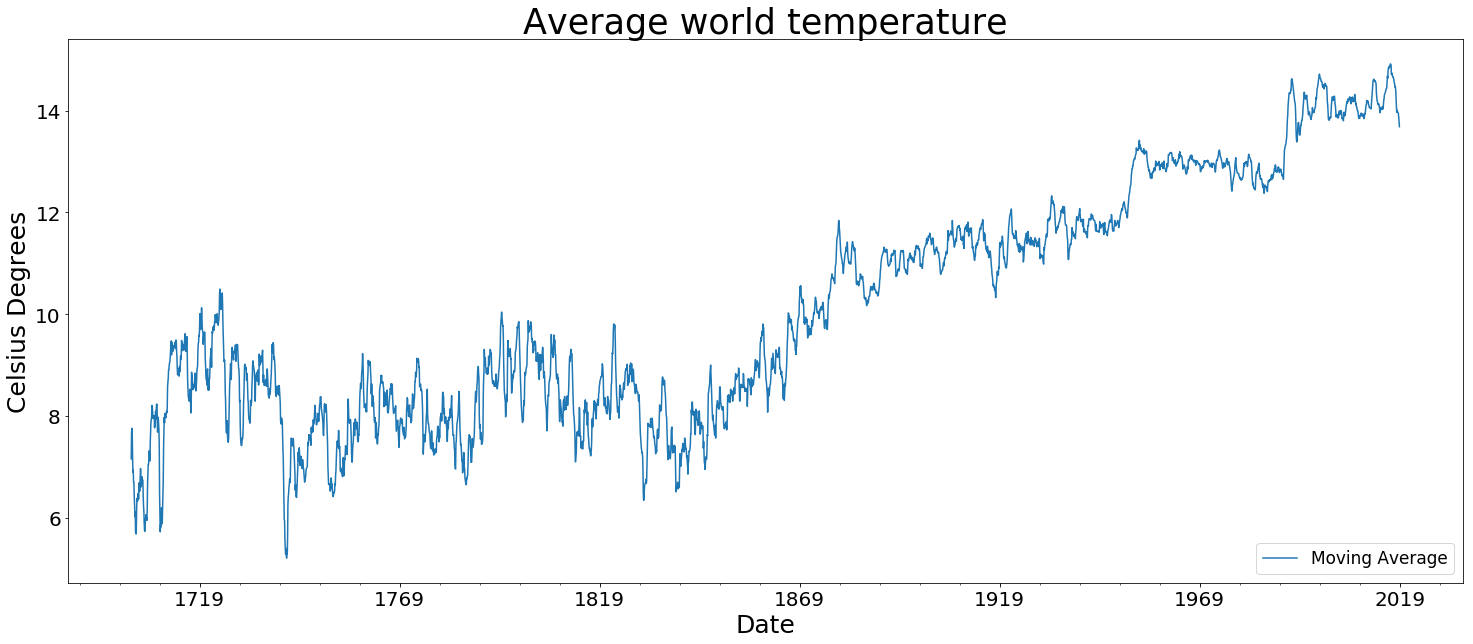

In [189]:
# Plot the moving average smoothing model. For window size=12 as is the number of the months
timeseries.rolling(12).mean().plot(label='Moving Average')
plt.title('Average world temperature', fontdict={'fontsize':35})
plt.legend(loc=4, fontsize=17)
plt.xlabel('Date', fontdict={'fontsize':25})
plt.ylabel('Celsius Degrees', fontdict={'fontsize':25})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

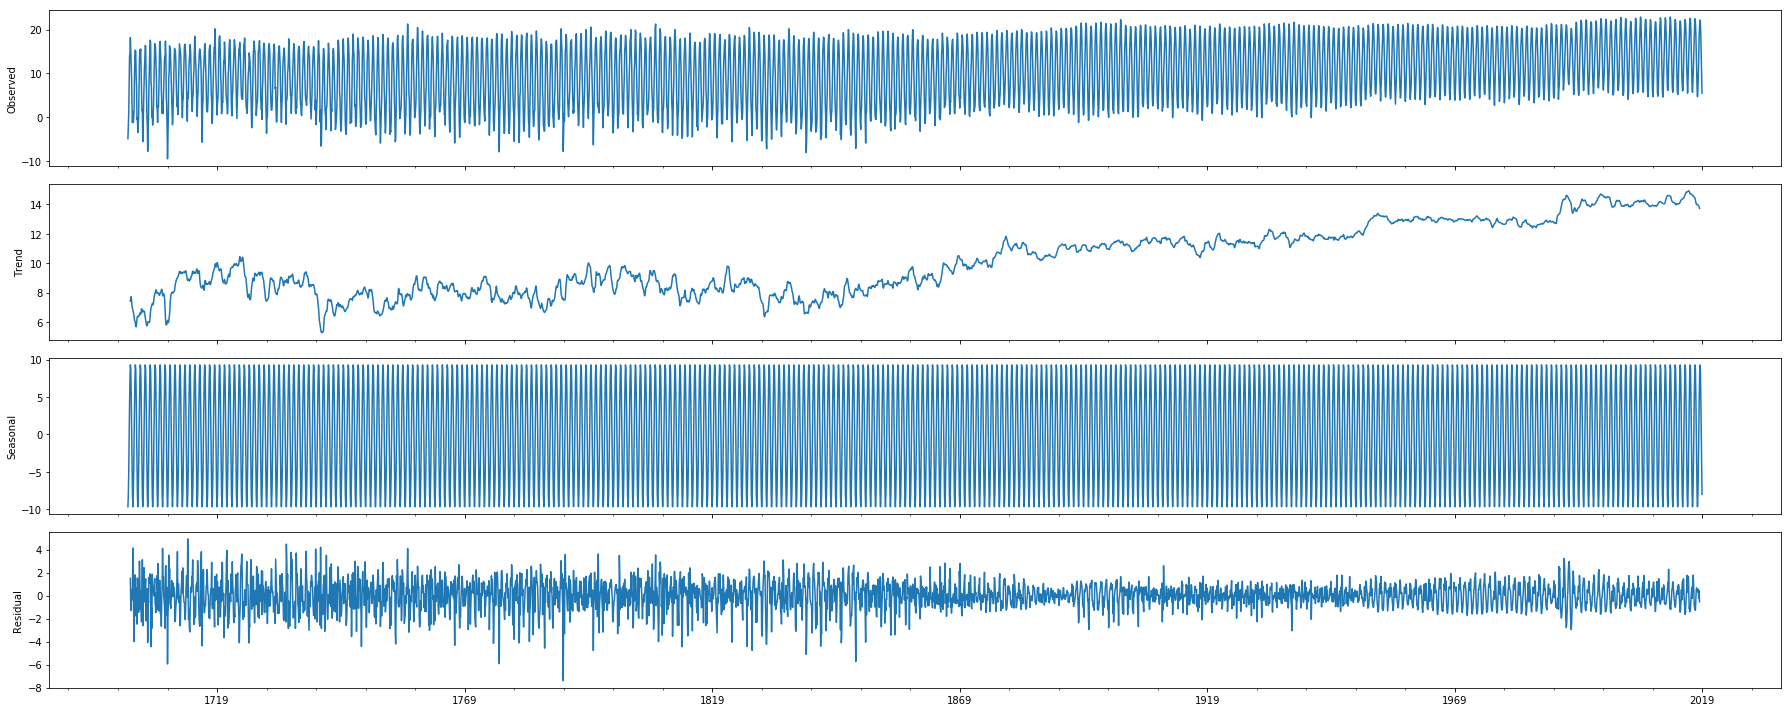

In [182]:
deco = seasonal_decompose(timeseries, model='additive')
deco.plot()
plt.show()


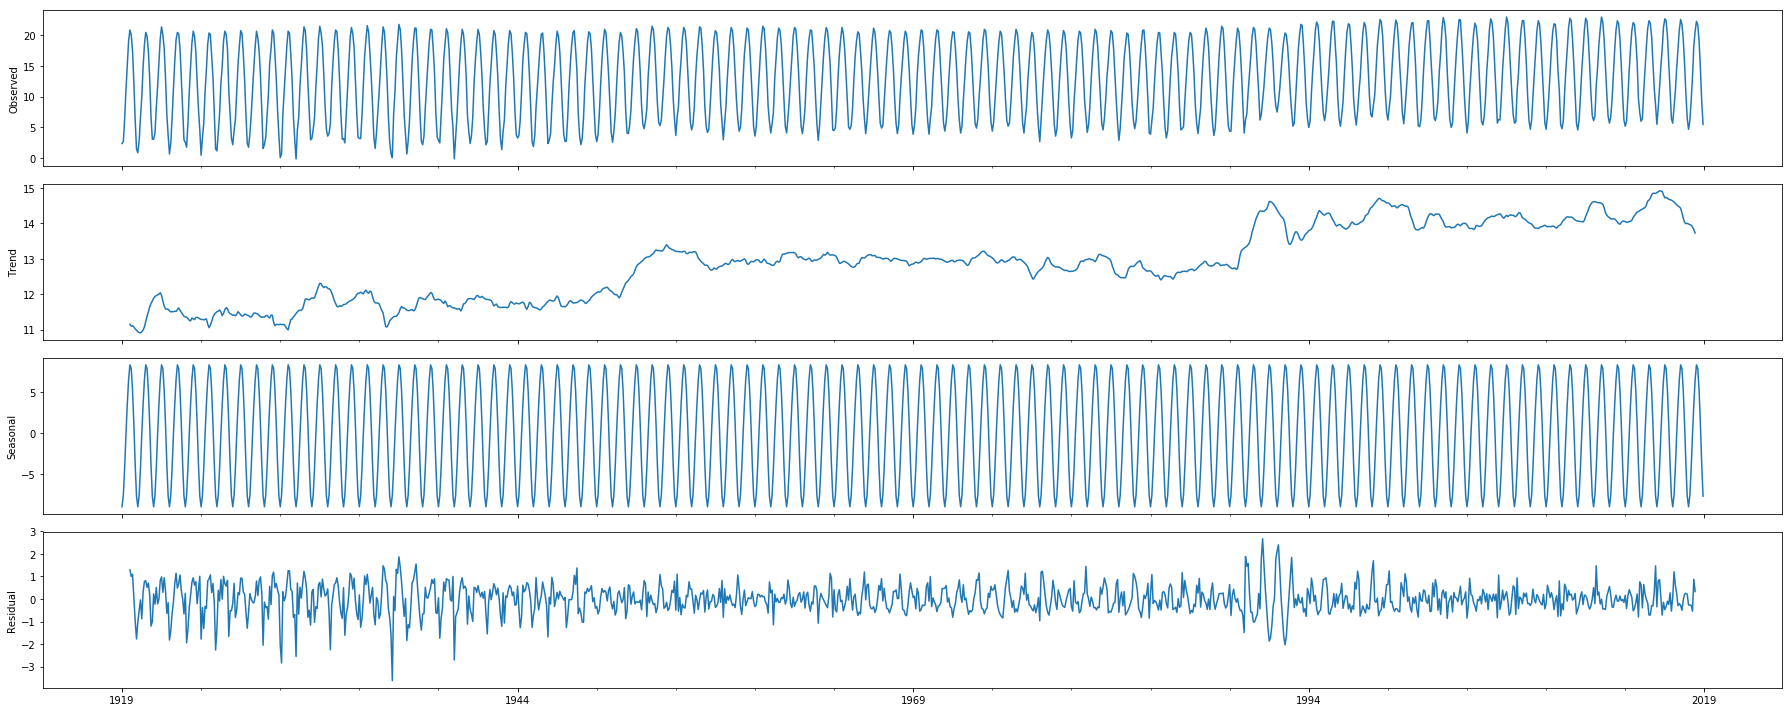

In [185]:
last_hundred = timeseries.loc['1919-01-01':'2018-12-01']

deco = seasonal_decompose(last_hundred, model='additive')
deco.plot()
plt.show()

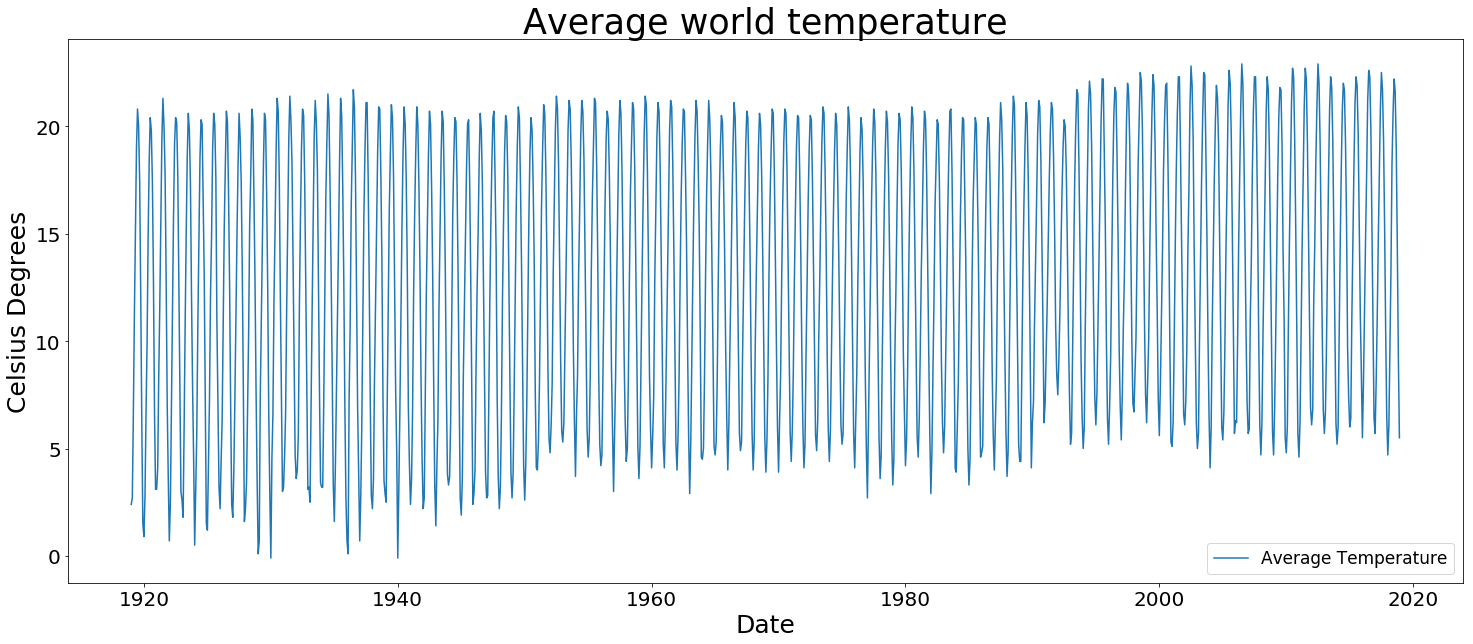

In [187]:
# Plot the timeseries
plt.plot(last_hundred, label='Average Temperature')
plt.title('Average world temperature', fontdict={'fontsize':35})
plt.legend(loc=4, fontsize=17)
plt.xlabel('Date', fontdict={'fontsize':25})
plt.ylabel('Celsius Degrees', fontdict={'fontsize':25})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

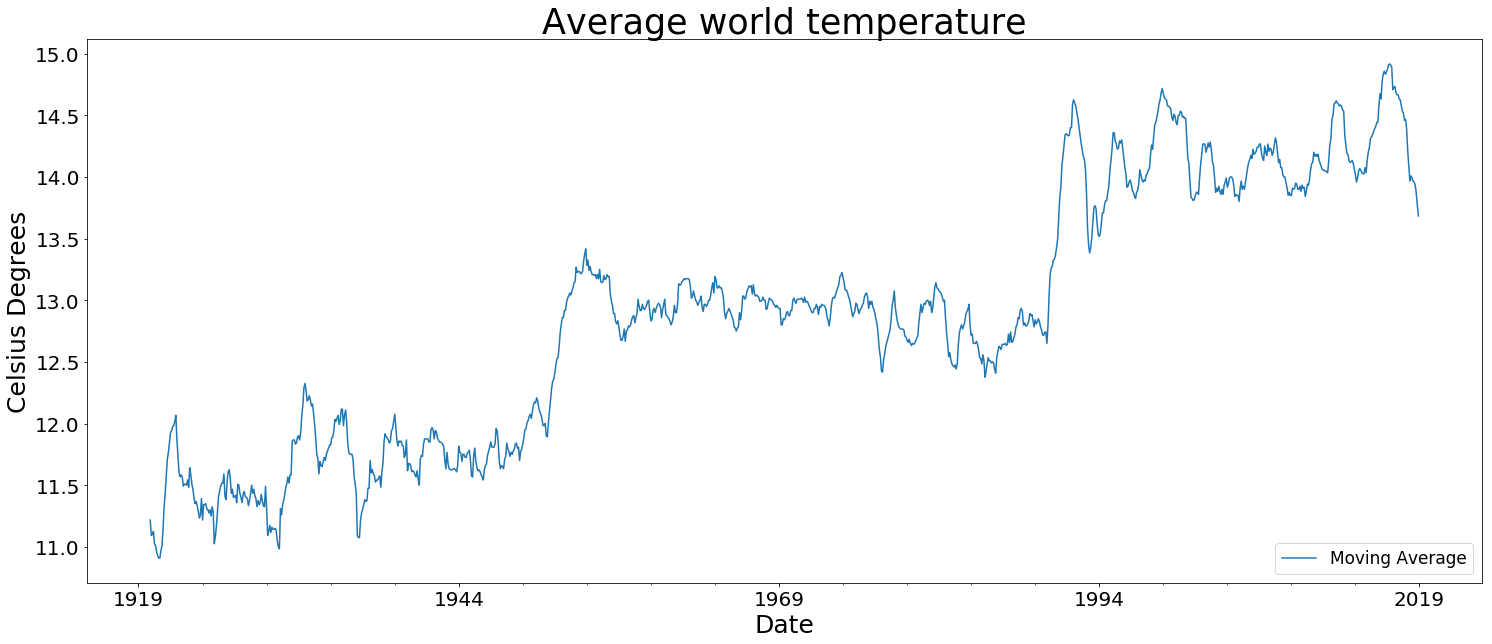

In [190]:
# Plot the moving average smoothing model. For window size=12 as is the number of the months
last_hundred.rolling(12).mean().plot(label='Moving Average')
plt.title('Average world temperature', fontdict={'fontsize':35})
plt.legend(loc=4, fontsize=17)
plt.xlabel('Date', fontdict={'fontsize':25})
plt.ylabel('Celsius Degrees', fontdict={'fontsize':25})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()